In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import random
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
np.set_printoptions(suppress=True)

In [21]:
#function to load the data and randomise it and normalise it further
def loadData():
    df = pd.read_csv('abalone.data', sep=",", index_col=False)
    df.columns = ["sex", "length", "diameter","height","whole weight","shucked weight","viscera weight","shell weight","rings"]
    df = df.sample(frac=1).reset_index(drop=True)
    #mapping male=0, female=1, infant=2
    data=np.array(df)
    for i in range(len(data)):
        if(data[i][0]=='M'):
            data[i][0]=2
        elif(data[i][0]=='F'):
            data[i][0]=1
        else:
            data[i][0]=0
    data=np.array(data,dtype=float)
        
#     print(df)
#     print(data)
#     normalise(data)
    x=data[:,:8]
    y=data[:,-1]
    x=normalise(x)
#     print(x)
#     print(y)
    return x,y
    
    
    
    

In [22]:
#to normalise data, gets big data into range
def normalise(data):
    data = (data - np.mean(data,axis=0))/np.std(data, axis=0)
    return data

In [4]:
#calculating the cost
def cost(x,y,theta):
    return sqrt(((np.matmul(x,theta)-y).T@(np.matmul(x,theta)-y))/(y.shape[0]))
    

In [5]:
#performing gradient decent to find the minimal cost
def gradientDecent(x,y,theta,learningRate,epoch,testingX,testingY):
#     y=np.reshape(y,(-1,1))
#     print("shapesxxxxxxxxxxxxxxxxxxxxx")
#     print(y.shape)
#     print(x.shape)
#     print(theta.shape)
#     check=np.matmul(x,theta)
#     print("checkddd",check)
#     print((x.T@np.matmul(x,theta)).shape)
#     print((x.T@check).shape)
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJTest=[]
#     for i in range(theta.shape[0]):
#         theta[i,0]=2
    for i in range(epoch):
        tempCost=(x.T@(np.matmul(x,theta)-y))/m
#         print("tempcost",tempCost.shape)
        theta-=(learningRate)*tempCost
        allJ.append(cost(x,y,theta))
        allJTest.append(cost(testingX,testingY,theta))
    
    return theta, allJ, allJTest
        
    

In [6]:
def train_test_split(x,y):
    trainX=[]
    testX=[]
    trainY=[]
    testY=[]
    #we have train:test = 8:2
    trainFreq=int((8/10)*x.shape[0])
    testFreq=x.shape[0]-trainFreq
    for i in range(trainFreq):
        trainX.append(x[i])
        trainY.append(y[i])
    for i in range(trainFreq,x.shape[0]):
        testX.append(x[i])
        testY.append(y[i])
    
    return np.array(trainX),np.array(trainY),np.array(testX),np.array(testY)
    

In [23]:
#performing linear regression by invoking all the functions
x,y = loadData()
# print(x.shape)
# print(y.shape)
y=np.reshape(y,(-1,1))
print(x.shape)
print(y.shape)
x = np.hstack((np.ones((x.shape[0],1)),x)) #adding a column of 1s for matrix multiplication
trainingX,trainingY,testingX,testingY = train_test_split(x,y)

theta=np.zeros((trainingX.shape[1],1))

theta, allJ, allJTest = gradientDecent(trainingX,trainingY,theta,0.1,200,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

J=cost(trainingX,trainingY,theta)
JTest=cost(testingX,testingY,theta)
print("Learning rate = 0.1")
print("Epoches = 200")
print("cost training: ",J)
print("parameters: ", theta)
print("cost testing",JTest)








(4176, 8)
(4176, 1)
Learning rate = 0.1
Epoches = 200
cost training:  2.246194230826042
parameters:  [[ 9.92591496]
 [ 0.33769381]
 [ 0.31890676]
 [ 0.81397448]
 [ 0.46497683]
 [ 0.49302312]
 [-2.34830631]
 [-0.37893371]
 [ 2.39359406]]
cost testing 2.1948065571883535


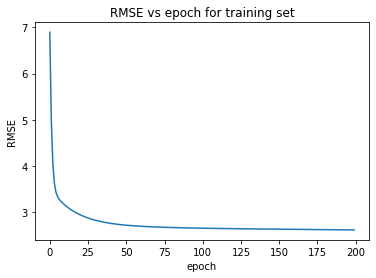

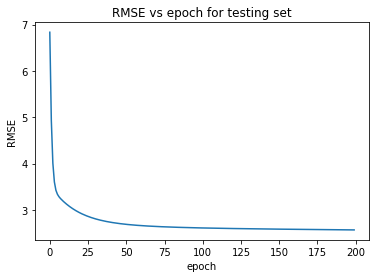

In [8]:
allJMean=np.array(allJ).mean(axis=0)
allJTestMean=np.mean(np.array(allJTest),axis=0)
# print(np.array(allJTest).shape)
# print(allJTestMean)
allJ=np.array(allJ)
allJTest=np.array(allJTest)
# print(allJ)
plt.plot(allJ)
plt.title("RMSE vs epoch for training set")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()
plt.plot(allJTest)
plt.title("RMSE vs epoch for testing set")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()

In [9]:
def ridgeRegression(x,y,learningRate,theta,L,epoch,testingX,testingY):
    
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJTest=[]
    
    for i in range(epoch):
        tempCost=(x.T@(np.matmul(x,theta)-y))/m
        tempCost+=L*np.sum(theta)
        theta-=(learningRate)*tempCost
        allJ.append(cost(x,y,theta))
        allJTest.append(cost(testingX,testingY,theta))
    
    return theta, allJ, allJTest

In [33]:
alphas=[1e-5,5e-5,1e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1]

hashyAlphasInfo={}

for alpha in alphas:
    
    
    theta=np.zeros((trainingX.shape[1],1))

    theta, allJRidge, allJTestRidge = ridgeRegression(trainingX,trainingY,0.1,theta,alpha,1000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

    J=cost(trainingX,trainingY,theta)
    JTest=cost(testingX,testingY,theta)
    print("Values for alpha = ",alpha)
    print("cost training for ridge regression: ",J)
    print("parameters for ridge regression: ", theta)
    print("cost testing for ridge regression",JTest)
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n\n")
    hashyAlphasInfo[alpha]=[{"training cost":J},{"testing cost":JTest},{"parameters":theta}]
    
print(hashyAlphasInfo)


Values for alpha =  1e-05
cost training for ridge regression:  2.22210759689599
parameters for ridge regression:  [[ 9.92836572]
 [ 0.32751462]
 [ 0.02594546]
 [ 1.10530775]
 [ 0.40732554]
 [ 2.04832885]
 [-3.30480373]
 [-0.64937132]
 [ 2.07703593]]
cost testing for ridge regression 2.1557337755244927
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  5e-05
cost training for ridge regression:  2.22210015460327
parameters for ridge regression:  [[ 9.92788674]
 [ 0.32720564]
 [ 0.02585319]
 [ 1.10536419]
 [ 0.40717209]
 [ 2.04907904]
 [-3.30523489]
 [-0.64956988]
 [ 2.07669533]]
cost testing for ridge regression 2.1557279554978415
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  0.0001
cost training for ridge regression:  2.222091212158706
parameters for ridge regression:  [[ 9.92728816]
 [ 0.3268195 ]
 [ 0.02573786]
 [ 1.10543472]
 [ 0.40698031]
 [ 2.05001657]
 [-3.30577373]
 [-0.64981802]
 [ 2.07626966]]
cost testing for ridge regression 2.15

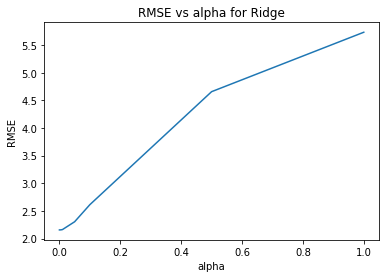

In [34]:
testingCostRidge=[]
alpha=[]
for i in hashyAlphasInfo:
    alpha.append(i)
    testingCostRidge.append(hashyAlphasInfo[i][1]['testing cost'])
plt.plot(alpha,testingCostRidge)
plt.title("RMSE vs alpha for Ridge")
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()


In [12]:
# #performing linear regression by invoking all the functions
# x,y = loadData()
# # print(x.shape)
# # print(y.shape)
# y=np.reshape(y,(-1,1))
# print(x.shape)
# print(y.shape)
# x = np.hstack((np.ones((x.shape[0],1)),x)) #adding a column of 1s for matrix multiplication
# trainingX,trainingY,testingX,testingY = train_test_split(x,y)

Optimal hyperparameter:  0.34636941773717345
cost training for ridge regression:  2.2138272601657474
parameters for ridge regression:  [[  3.75096011]
 [  0.42262155]
 [  5.15613216]
 [  4.61236261]
 [ -0.62711416]
 [ 10.94962515]
 [-21.80240329]
 [-10.36805501]
 [  7.91753558]]
cost testing for ridge regression 2.2389043603215417


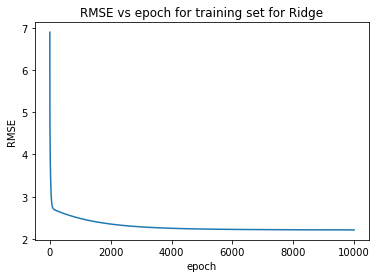

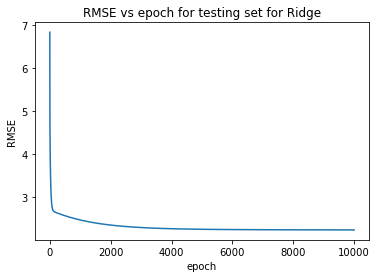

In [17]:
alphas = np.logspace(-4,100,1000)
model = Ridge()
grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas))
grid.fit(trainingX,trainingY)
L = grid.best_estimator_.alpha
print("Optimal hyperparameter: ",L)

theta=np.zeros((trainingX.shape[1],1))

theta, allJRidge, allJTestRidge = ridgeRegression(trainingX,trainingY,0.1,theta,L,10000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

J=cost(trainingX,trainingY,theta)
JTest=cost(testingX,testingY,theta)
print("cost training for ridge regression: ",J)
print("parameters for ridge regression: ", theta)
print("cost testing for ridge regression",JTest)

allJRidge=np.array(allJRidge)
allJTestRidge=np.array(allJTestRidge)
plt.plot(allJRidge)
plt.title("RMSE vs epoch for training set for Ridge")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()
plt.plot(allJTestRidge)
plt.title("RMSE vs epoch for testing set for Ridge")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()


In [14]:
def lassoRegression(x,y,learningRate,theta,L,epoch,testingX,testingY):
    
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJTest=[]
    
    for i in range(theta.shape[0]):
        theta[i]=2
        
    
    for i in range(epoch):
        tempCost=(x.T@(np.matmul(x,theta)-y))/m
        tempCost+=2*L*np.sum(theta/np.abs(theta))
        theta-=(learningRate)*tempCost
        allJ.append(cost(x,y,theta))
        allJTest.append(cost(testingX,testingY,theta))
    
    return theta, allJ, allJTest

In [30]:
alphas= [1e-5,5e-5,1e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1,5,10]
hashyAlphasInfoLasso={}

for alpha in alphas:
    
    
    theta=np.zeros((trainingX.shape[1],1))

    theta, allJLasso, allJTestLasso = lassoRegression(trainingX,trainingY,0.1,theta,alpha,1000,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

    J=cost(trainingX,trainingY,theta)
    JTest=cost(testingX,testingY,theta)
    print("Values for alpha = ",alpha)
    print("cost training for lasso regression: ",J)
    print("parameters for lasso regression: ", theta)
    print("cost testing for lasso regression",JTest)
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n\n")
    hashyAlphasInfoLasso[alpha]=[{"training cost":J},{"testing cost":JTest},{"parameters":theta}]
    
print(hashyAlphasInfoLasso)

Values for alpha =  1e-05
cost training for lasso regression:  2.2223383340277687
parameters for lasso regression:  [[ 9.92836814]
 [ 0.32757659]
 [ 0.02724225]
 [ 1.10371032]
 [ 0.40737721]
 [ 2.02397756]
 [-3.29434938]
 [-0.64353454]
 [ 2.08609856]]
cost testing for lasso regression 2.1560455467881097
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  5e-05
cost training for lasso regression:  2.2223319465408395
parameters for lasso regression:  [[ 9.92796782]
 [ 0.32731833]
 [ 0.02716471]
 [ 1.10375799]
 [ 0.40724895]
 [ 2.02461271]
 [-3.29471322]
 [-0.64370247]
 [ 2.08581086]]
cost testing for lasso regression 2.156040475795904
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Values for alpha =  0.0001
cost training for lasso regression:  2.22232421264114
parameters for lasso regression:  [[ 9.92746742]
 [ 0.32699551]
 [ 0.02706779]
 [ 1.10381758]
 [ 0.40708862]
 [ 2.02540664]
 [-3.29516802]
 [-0.64391238]
 [ 2.08545122]]
cost testing for lasso regression 2.

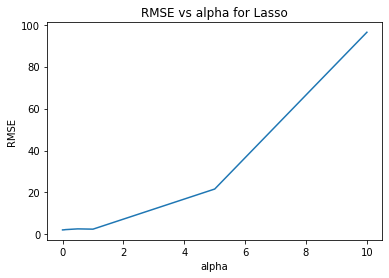

In [31]:
testingCostRidge=[]
alpha=[]
for i in hashyAlphasInfoLasso:
    alpha.append(i)
    testingCostRidge.append(hashyAlphasInfoLasso[i][1]['testing cost'])
plt.plot(alpha,testingCostRidge)
plt.title("RMSE vs alpha for Lasso")
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

Optimal hyperparameter:  0.00404209583979631
cost training for lasso regression:  2.232981560357714
parameters for lasso regression:  [[ 9.88713995]
 [ 0.30499919]
 [ 0.15831581]
 [ 0.95859952]
 [ 0.39887937]
 [ 1.17166015]
 [-2.91918719]
 [-0.46369799]
 [ 2.39870652]]
cost testing for lasso regression 2.171135847471393


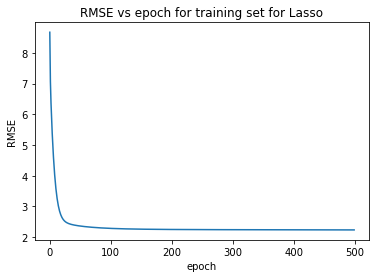

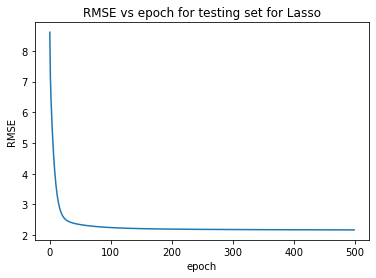

In [35]:
alphas = np.logspace(-4,1,1000)
model = Lasso()
grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas))
grid.fit(trainingX,trainingY)
L = grid.best_estimator_.alpha
print("Optimal hyperparameter: ",L)

theta=np.zeros((trainingX.shape[1],1))

theta, allJLasso, allJTestLasso = lassoRegression(trainingX,trainingY,0.1,theta,L,500,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch

# theta, allJLasso, allJTestLasso = gradientDecent(trainingX,trainingY,theta,0.1,200,testingX,testingY) #we have a learning rate of 0.1 and 100000 epoch


J=cost(trainingX,trainingY,theta)
JTest=cost(testingX,testingY,theta)
print("cost training for lasso regression: ",J)
print("parameters for lasso regression: ", theta)
print("cost testing for lasso regression",JTest)

allJRidge=np.array(allJLasso)
allJTestRidge=np.array(allJTestLasso)
plt.plot(allJLasso)
plt.title("RMSE vs epoch for training set for Lasso")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()
plt.plot(allJTestLasso)
plt.title("RMSE vs epoch for testing set for Lasso")
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.show()